In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
DATA_PATH = "../data/raw/WELFake_Dataset.csv"

df = pd.read_csv(DATA_PATH)

In [3]:
# 1 = fake
# 0 = true

In [4]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [5]:
df.iloc[2]

Unnamed: 0                                                    2
title         UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
text           Now, most of the demonstrators gathered last ...
label                                                         1
Name: 2, dtype: object

In [6]:
df.columns, df.head(5)

(Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object'),
    Unnamed: 0                                              title  \
 0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
 1           1                                                NaN   
 2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
 3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
 4           4  SATAN 2: Russia unvelis an image of its terrif...   
 
                                                 text  label  
 0  No comment is expected from Barack Obama Membe...      1  
 1     Did they post their votes for Hillary already?      1  
 2   Now, most of the demonstrators gathered last ...      1  
 3  A dozen politically active pastors came here f...      0  
 4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  )

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df["Unnamed: 0"].nunique()

72134

In [10]:
df.shape[0]

72134

In [11]:
# Unnamed: 0 -> ID, njega mozemo da izbacimo.

In [12]:
df.isna().sum().sort_values(ascending=False)

title         558
text           39
Unnamed: 0      0
label           0
dtype: int64

In [13]:
df["label"].value_counts(dropna=False)

label
1    37106
0    35028
Name: count, dtype: int64

,count,percent
label,,
1,37106,51.44
0,35028,48.56


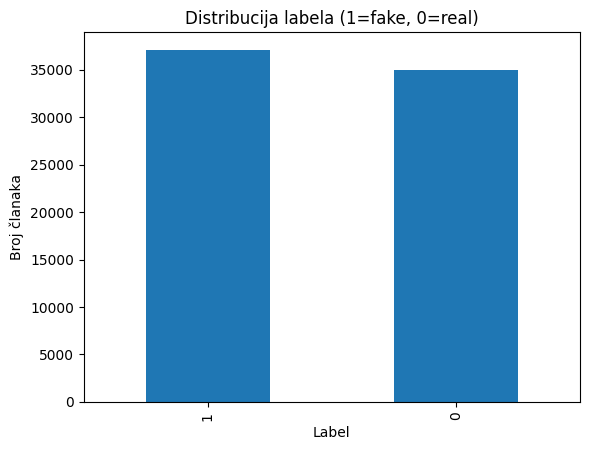

In [14]:
label_counts = df["label"].value_counts()
label_percent = (label_counts / label_counts.sum() * 100).round(2)

display(pd.DataFrame({"count": label_counts, "percent": label_percent}))

label_counts.plot(kind="bar")
plt.title("Distribucija labela (1=fake, 0=real)")
plt.xlabel("Label")
plt.ylabel("Broj članaka")
plt.show()

In [15]:
df["title_len"] = df["title"].astype(str).apply(len)
df["text_len"]  = df["text"].astype(str).apply(len)

df[["title_len", "text_len"]].describe()

,title_len,text_len
count,72134.000000,72134.000000
mean,76.567527,3268.389456
std,25.768063,3732.876125
min,1.000000,1.000000
25%,61.000000,1377.000000
50%,73.000000,2424.000000
75%,89.000000,4059.000000
max,456.000000,142961.000000


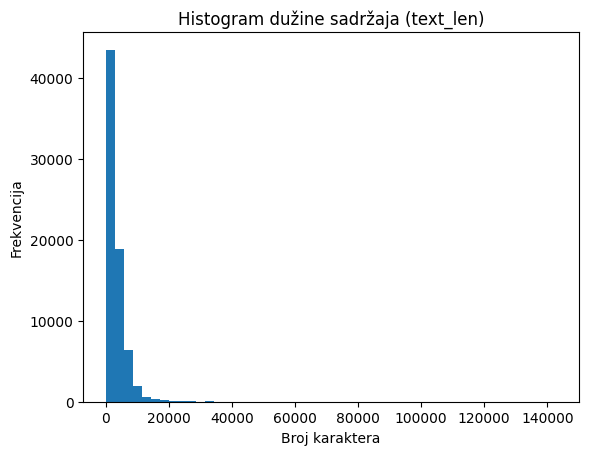

In [16]:
plt.figure()
df["text_len"].plot(kind="hist", bins=50)
plt.title("Histogram dužine sadržaja (text_len)")
plt.xlabel("Broj karaktera")
plt.ylabel("Frekvencija")
plt.show()

In [17]:
# Vecina je kraca, a mali broj je bas dugacak

In [18]:
empty_text = (df["text"].isna()) | (df["text"].astype(str).str.strip().isin(["", "nan", "None"]))
empty_title = (df["title"].isna()) | (df["title"].astype(str).str.strip().isin(["", "nan", "None"]))

empty_text.sum(), empty_title.sum()

(np.int64(783), np.int64(558))

In [19]:
print("Zaključci (pre čišćenja):")
print(f"- Broj redova: {df.shape[0]}")
print(f"- Kolone: {list(df.columns)}")
print(f"- Prazan text: {empty_text.sum()}")
print(f"- Prazan title: {empty_title.sum()}")
print("- Distribucija labela:")
print(label_counts)

Zaključci (pre čišćenja):
- Broj redova: 72134
- Kolone: ['Unnamed: 0', 'title', 'text', 'label', 'title_len', 'text_len']
- Prazan text: 783
- Prazan title: 558
- Distribucija labela:
label
1    37106
0    35028
Name: count, dtype: int64


In [20]:
#preprocessing

In [21]:
# unnamed je ID, pa samim tim mozemo da ga izbacimo

In [22]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
df.columns

Index(['title', 'text', 'label', 'title_len', 'text_len'], dtype='object')

In [23]:
df.head()

,title,text,label,title_len,text_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130,5049
1,NaN,Did they post their votes for Hillary already?,1,3,46
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,137,216
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,105,8010
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,95,1916


In [24]:
df[df['title'].isna()]

,title,text,label,title_len,text_len
1,NaN,Did they post their votes for Hillary already?,1,3,46
43,NaN,True. Hillary needs a distraction and what bet...,1,3,88
162,NaN,All eyes on Electoral delegates. The People kn...,1,3,65
185,NaN,Cool,1,3,4
269,NaN,A leading US senator: US Supporting War in Syr...,1,3,5289
...,...,...,...,...,...
71484,NaN,Another Arab supremacist masturbation fantasy....,1,3,662
71521,NaN,I'm sure they drastically changed accounting m...,1,3,95
71540,NaN,It's easy to imagine Obama or Kerry pissing hi...,1,3,117
71570,NaN,Ever since the powers to be assassinated JFK A...,1,3,289


In [25]:
df[df['text'].isna()]

,title,text,label,title_len,text_len
2457,Après le succès de « Mariés au premier regard ...,NaN,1,105,3
3534,Elections US : les premières estimations donne...,NaN,1,95,3
3709,110% des Américains assurent qu’ils continuero...,NaN,1,92,3
5612,Des millions d’Américains recherchent massivem...,NaN,1,116,3
6270,Vladimir Poutine est élu 45e Président des Eta...,NaN,1,66,3
6997,Les Américains ne sont plus qu’à quelques heur...,NaN,1,102,3
7083,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,1,123,3
8974,Live Soirée présidentielle US 2016 >> Le Gorafi,NaN,1,47,3
16717,Ne supportant plus l’ambiance de la campagne é...,NaN,1,125,3
17781,Débat Primaire de la Droite : les Français pas...,NaN,1,124,3


In [26]:
df[df['text'].isna() & df['label'].isna()]

,title,text,label,title_len,text_len


In [27]:
# Ne postoji nijedan red koji je ujedno NaN u "textu" i "title", a to je jedini slucaj koji nam nikako ne odgovara
# Tako da ne moramo nista da izbacujemo iz dataseta
# kad imamo samo text ili samo title, to je u redu

In [28]:
# Analizom nedostajućih vrednosti utvrđeno je da u datasetu ne postoje primeri kod kojih istovremeno nedostaju i naslov i tekst vesti.
# Zbog toga je primenjena strategija objedinjavanja dostupnih tekstualnih polja u jedno ulazno polje, čime je očuvana celokupna količina
# podataka bez odbacivanja primera.

In [29]:
df.columns

Index(['title', 'text', 'label', 'title_len', 'text_len'], dtype='object')

In [30]:
df.head()

,title,text,label,title_len,text_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130,5049
1,NaN,Did they post their votes for Hillary already?,1,3,46
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,137,216
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,105,8010
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,95,1916


In [31]:
df.columns

Index(['title', 'text', 'label', 'title_len', 'text_len'], dtype='object')

In [32]:
pd.reset_option('display.max_colwidth')

In [33]:
df.head(20)

,title,text,label,title_len,text_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130,5049
1,NaN,Did they post their votes for Hillary already?,1,3,46
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,137,216
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,105,8010
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,95,1916
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,78,1530
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1,105,81
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,79,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,116,1439
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1,66,3007


In [34]:
df.head()

,title,text,label,title_len,text_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130,5049
1,NaN,Did they post their votes for Hillary already?,1,3,46
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,137,216
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,105,8010
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,95,1916


In [35]:
# PRETPOSTAVKA:
# 1 = FAKE
# 0 = REAL

LABEL_FAKE = 1
LABEL_REAL = 0

df["label"].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

In [36]:
df_prep = df.copy()

In [37]:
df_prep.shape

(72134, 5)

In [38]:
df_prep = df_prep.drop(columns=["Unnamed: 0"], errors="ignore")
df_prep.columns

Index(['title', 'text', 'label', 'title_len', 'text_len'], dtype='object')

In [39]:
pd.set_option('display.max_colwidth', None)

In [40]:
def safe_text(x):
    if pd.isna(x):
        return ""
    x = str(x).strip()
    if x.lower() in ["nan", "none"]:
        return ""
    return x

df_prep["title_safe"] = df_prep["title"].apply(safe_text)
df_prep["text_safe"]  = df_prep["text"].apply(safe_text)

df_prep["content"] = (df_prep["title_safe"] + " " + df_prep["text_safe"]).str.strip()

df_prep[["title", "text", "content", "label"]].head(2)


title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]   
1                                                                                                                                 NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [42]:
df_prep.head(2)

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]   
1                                                                                                                                 NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [43]:
before = df_prep.shape[0]
df_clean = df_prep[df_prep["content"].str.len() > 0].copy()
after = df_clean.shape[0]

print("Pre:", before)
print("Posle:", after)
print("Uklonjeno:", before - after)

Pre: 72134
Posle: 72134
Uklonjeno: 0


In [44]:
# nema slucajeva gde su i jedan i drugi nan

In [45]:
import re

def basic_clean_text(s: str) -> str:
    s = s.lower()
    s = re.sub(r"http\S+|www\.\S+", " ", s)   # ukloni URL
    s = re.sub(r"<.*?>", " ", s)             # ukloni HTML tagove
    s = re.sub(r"\s+", " ", s).strip()       # sredi razmake
    return s

df_clean["content_clean"] = df_clean["content"].apply(basic_clean_text)

df_clean["content_clean"].head(2)

0    law enforcement on high alert following threats against cops and whites on 9-11by #blacklivesmatter and #fyf911 terrorists [video] no comment is expected from barack obama members of the #fyf911 or #fukyoflag and #blacklivesmatter movements called for the lynching and hanging of white people and cops. they encouraged others on a radio show tuesday night to turn the tide and kill white people and cops to send a message about the killing of black people in america.one of the f***yoflag organizers is called sunshine. she has a radio blog show hosted from texas called, sunshine s f***ing opinion radio show. a snapshot of her #fyf911 @lolatwhitefear twitter page at 9:53 p.m. shows that she was urging supporters to call now!! #fyf911 tonight we continue to dismantle the illusion of white below is a snapshot twitter radio call invite #fyf911the radio show aired at 10:00 p.m. eastern standard time.during the show, callers clearly call for lynching and killing of white people.a 2:39 minute

In [46]:
before2 = df_clean.shape[0]
df_clean = df_clean[df_clean["content_clean"].str.len() > 0].copy()
after2 = df_clean.shape[0]

print("Pre:", before2)
print("Posle:", after2)
print("Uklonjeno:", before2 - after2)

Pre: 72134
Posle: 72125
Uklonjeno: 9


In [47]:
# posle ciscenja oni koji su ostali prazni njih uklanjamo

In [48]:
import os
os.makedirs("data/processed", exist_ok=True)

out_path = "data/processed/wel_fake_clean.csv"
df_clean.to_csv(out_path, index=False)

print("Sačuvano:", out_path)
print("Shape:", df_clean.shape)

Sačuvano: data/processed/wel_fake_clean.csv
Shape: (72125, 9)


In [49]:
df_clean["label"].value_counts()

label
1    37097
0    35028
Name: count, dtype: int64

In [50]:
df_clean.columns

Index(['title', 'text', 'label', 'title_len', 'text_len', 'title_safe',
       'text_safe', 'content', 'content_clean'],
      dtype='object')

In [51]:
df.columns

Index(['title', 'text', 'label', 'title_len', 'text_len'], dtype='object')

In [54]:
# sad ide vektorizacija(TF-IDF)

In [55]:
X_text = df_clean["content_clean"]
y = df_clean["label"].astype(int)

X_text.shape, y.shape, y.value_counts()

((72125,),
 (72125,),
 label
 1    37097
 0    35028
 Name: count, dtype: int64)

In [57]:
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# stratify=y -> održava odnos klasa (fake/real) u oba skupa, da test ne bude slučajno pristrasan.

X_train_text.shape, X_test_text.shape, y_train.value_counts(normalize=True).round(3), y_test.value_counts(normalize=True).round(3)

((57700,),
 (14425,),
 label
 1    0.514
 0    0.486
 Name: proportion, dtype: float64,
 label
 1    0.514
 0    0.486
 Name: proportion, dtype: float64)

In [58]:
y_train.value_counts(normalize=True).round(3)

label
1    0.514
0    0.486
Name: proportion, dtype: float64

In [ ]:
#fit_transform
    # fit
    #   gradi rečnik (vocabulary)
    #   računa IDF vrednosti za svaku reč
    # transform
    #   svaki dokument pretvara u numerički vektor

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words="english",   # uklanja najčešće reči tipa: the, is, and...
    min_df=2,               # ignoriše reči koje se pojavljuju samo 1 put u korpusu (šum)
    max_df=0.95,            # ignoriše reči koje se pojavljuju u >95% dokumenata (previše opšte)
    ngram_range=(1, 2),     # unigram + bigram (reči i parovi reči)
    max_features=50000      # ograničenje broja osobina (radi memorije i brzine)
)

X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

X_train_tfidf.shape, X_test_tfidf.shape

((57700, 50000), (14425, 50000))

In [61]:
# 57700 trening dokumenta
# 14425 test dokumenta
# 50000 razlicitih reci(feature-a)

In [62]:
feature_names = tfidf.get_feature_names_out()
# Numpy array svih reči u vokabularu
# Redosled tačno odgovara kolonama u TF-IDF matrici

# uzmimo jedan dokument iz train skupa
i = 0
row = X_train_tfidf[i].toarray().ravel() # izvlacenje tfidf vektora tog dokumenta

top_idx = row.argsort()[-15:][::-1]  # indeksi 15 najvećih tf-idf vrednosti

top_words = [(feature_names[j], row[j]) for j in top_idx if row[j] > 0]
top_words[:15]

[('clinton', np.float64(0.3018462039898168)),
 ('assange', np.float64(0.23596424802982713)),
 ('crime family', np.float64(0.1951847765028614)),
 ('clinton crime', np.float64(0.18766105883610187)),
 ('hillary', np.float64(0.1858942467659025)),
 ('life', np.float64(0.1611279188844996)),
 ('impeachment', np.float64(0.15286188040311507)),
 ('weiner', np.float64(0.14921171131591401)),
 ('klein', np.float64(0.13014633318879695)),
 ('information', np.float64(0.1248312236044185)),
 ('fbi', np.float64(0.12312510621579377)),
 ('terrified', np.float64(0.1212030448069098)),
 ('hillary clinton', np.float64(0.10785693241712112)),
 ('crime', np.float64(0.10330437867427673)),
 ('aaron klein', np.float64(0.10106684111723171))]

In [69]:
feature_names[: 150]

array(['00', '00 00', '00 eastern', '00 pm', '000', '000 000',
       '000 according', '000 acres', '000 american', '000 americans',
       '000 barrels', '000 campaign', '000 cases', '000 cash',
       '000 children', '000 civilians', '000 clinton', '000 day',
       '000 deaths', '000 dollars', '000 donation', '000 emails',
       '000 employees', '000 euros', '000 feet', '000 fighters',
       '000 fine', '000 followers', '000 foreign', '000 homes',
       '000 illegal', '000 immigrants', '000 jobs', '000 km', '000 lives',
       '000 members', '000 migrants', '000 miles', '000 million',
       '000 month', '000 muslim', '000 muslims', '000 new', '000 pages',
       '000 people', '000 police', '000 pounds', '000 refugees',
       '000 residents', '000 rohingya', '000 signatures', '000 soldiers',
       '000 square', '000 state', '000 strong', '000 students',
       '000 syrian', '000 times', '000 tonnes', '000 troops', '000 trump',
       '000 vehicles', '000 votes', '000 women', '0

In [72]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)

X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

X_train_svd.shape, X_test_svd.shape

((57700, 300), (14425, 300))

In [75]:
print(svd.explained_variance_ratio_.sum(), X_train_tfidf.shape, X_train_svd.shape)

0.23339850919661556 (57700, 50000) (57700, 300)


In [76]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# uzorak radi brzine i preglednosti grafika
SAMPLE_SIZE = 8000
rng = np.random.RandomState(42)
sample_idx = rng.choice(X_train_tfidf.shape[0], size=min(SAMPLE_SIZE, X_train_tfidf.shape[0]), replace=False)

X_sample_tfidf = X_train_tfidf[sample_idx]
y_sample = y_train.iloc[sample_idx].values if hasattr(y_train, "iloc") else np.array(y_train)[sample_idx]

svd2 = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd2.fit_transform(X_sample_tfidf)

svd3 = TruncatedSVD(n_components=3, random_state=42)
X_3d = svd3.fit_transform(X_sample_tfidf)

X_2d.shape, X_3d.shape

((8000, 2), (8000, 3))

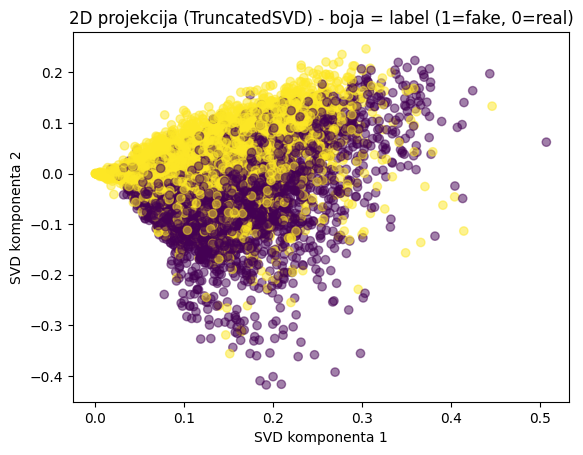

In [77]:
plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_sample, alpha=0.5)
plt.title("2D projekcija (TruncatedSVD) - boja = label (1=fake, 0=real)")
plt.xlabel("SVD komponenta 1")
plt.ylabel("SVD komponenta 2")
plt.show()

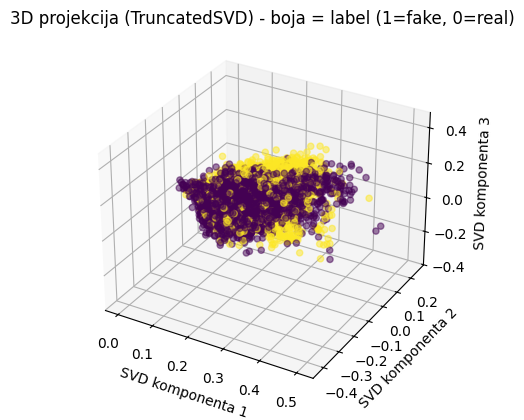

In [78]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (potrebno za 3D)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_sample, alpha=0.5)

ax.set_title("3D projekcija (TruncatedSVD) - boja = label (1=fake, 0=real)")
ax.set_xlabel("SVD komponenta 1")
ax.set_ylabel("SVD komponenta 2")
ax.set_zlabel("SVD komponenta 3")

plt.show()

In [80]:
#Na slici je prikazana dvodimenzionalna projekcija dokumenata dobijena primenom TruncatedSVD metode nad TF-IDF reprezentacijom teksta. 
#Uočen je značajan stepen preklapanja klasa, što ukazuje da fake i real vesti ne mogu biti jasno razdvojene na osnovu malog broja 
# latentnih komponenti. Ipak, primećuju se razlike u gustini i rasporedu instanci,
#što sugeriše da kombinacija većeg broja dimenzija može omogućiti uspešnu klasifikaciju.

In [81]:
from sklearn.linear_model import LogisticRegression

logreg_tfidf = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    random_state=42
)

logreg_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [82]:
y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_tfidf)

0.950155979202773

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tfidf, target_names=["REAL (0)", "FAKE (1)"]))

              precision    recall  f1-score   support

    REAL (0)       0.96      0.94      0.95      7006
    FAKE (1)       0.95      0.96      0.95      7419

    accuracy                           0.95     14425
   macro avg       0.95      0.95      0.95     14425
weighted avg       0.95      0.95      0.95     14425



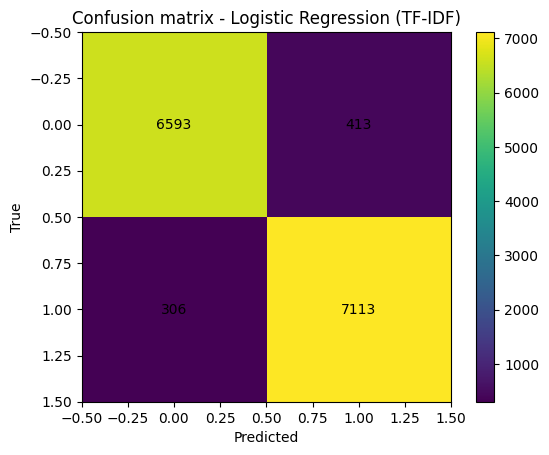

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_tfidf)

plt.figure()
plt.imshow(cm)
plt.title("Confusion matrix - Logistic Regression (TF-IDF)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

In [86]:
logreg_svd = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    random_state=42
)

logreg_svd.fit(X_train_svd, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [87]:
y_pred_svd = logreg_svd.predict(X_test_svd)

print("Accuracy (SVD):", accuracy_score(y_test, y_pred_svd))
print(classification_report(y_test, y_pred_svd, target_names=["REAL (0)", "FAKE (1)"]))

Accuracy (SVD): 0.9215944540727903
              precision    recall  f1-score   support

    REAL (0)       0.92      0.91      0.92      7006
    FAKE (1)       0.92      0.93      0.92      7419

    accuracy                           0.92     14425
   macro avg       0.92      0.92      0.92     14425
weighted avg       0.92      0.92      0.92     14425



In [88]:
# Logistic Regression je korišćen kao osnovni klasifikacioni model zbog dobre skalabilnosti i efikasnosti
# u radu sa visokodimenzionalnim tekstualnim podacima. Model treniran nad TF-IDF reprezentacijom postiže bolje 
# performanse u odnosu na verziju sa redukovanim skupom atributa dobijenim primenom TruncatedSVD, što ukazuje da
# deo diskriminativnih informacija biva izgubljen tokom redukcije dimenzionalnosti.